In [31]:
import keras
import numpy as np
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import cv2
%matplotlib inline

#https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt   

In [2]:
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')
# include_top=False : CNN 부분만 가져오기. 특징추출만.

#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')


#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')
 
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')  

Instructions for updating:
If using Keras pass *_constraint arguments to layers.




In [3]:
vgg_model.summary()    # 138,357,544
# inception_model.summary() # 23,851,784
# resnet_model.summary()  # 25,636,712
# mobilenet_model.summary() # 4,253,864

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [50]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'cnntest',
    target_size=(224, 224),
    batch_size=13)

img, _ = test_generator.next()

Found 13 images belonging to 1 classes.


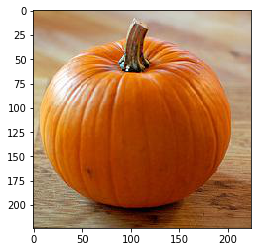

In [62]:

plt.imshow(img[2])


In [64]:
predictions = vgg_model.predict(vgg16.preprocess_input(img.copy()))
label_vgg = decode_predictions(predictions)

predictions = resnet_model.predict(resnet50.preprocess_input(img.copy()))
label_resnet = decode_predictions(predictions)

mobilenet_model.predict(mobilenet.preprocess_input(img.copy()))
label_mobilenet = decode_predictions(predictions)

In [65]:
label_vgg

[[('n03729826', 'matchstick', 0.074946865),
  ('n01930112', 'nematode', 0.048541237),
  ('n03666591', 'lighter', 0.030869287),
  ('n03196217', 'digital_clock', 0.030427156),
  ('n04286575', 'spotlight', 0.024627704)],
 [('n03729826', 'matchstick', 0.07608795),
  ('n01930112', 'nematode', 0.047557168),
  ('n03666591', 'lighter', 0.03089585),
  ('n03196217', 'digital_clock', 0.02962841),
  ('n04286575', 'spotlight', 0.024064204)],
 [('n03729826', 'matchstick', 0.07616404),
  ('n01930112', 'nematode', 0.047846433),
  ('n03666591', 'lighter', 0.030721564),
  ('n03196217', 'digital_clock', 0.029046467),
  ('n04286575', 'spotlight', 0.023550298)],
 [('n03729826', 'matchstick', 0.07594631),
  ('n01930112', 'nematode', 0.048331413),
  ('n03666591', 'lighter', 0.03074031),
  ('n03196217', 'digital_clock', 0.029731063),
  ('n04286575', 'spotlight', 0.023959957)],
 [('n03729826', 'matchstick', 0.07600777),
  ('n01930112', 'nematode', 0.04817356),
  ('n03666591', 'lighter', 0.030650184),
  ('n0319

In [66]:
for i in range(13):
    img1 = cv2.resize(img[i]*255, (1000,1000))
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    cv2.putText(img1, "VGG16: {}, {:.2f}".format(label_vgg[0][0][1], label_vgg[0][0][2]) , (350, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
    cv2.putText(img1, "MobileNet: {}, {:.2f}".format(label_mobilenet[0][0][1], label_mobilenet[0][0][2]) , (350, 75), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
    cv2.putText(img1, "ResNet50: {}, {:.2f}".format(label_resnet[0][0][1], label_resnet[0][0][2]) , (350, 115), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
    cv2.imwrite('output/out'+str(i)+'.jpg', img1)

In [ ]:
# img = cv2.resize(X*255, (1000,1000))
# cvt
# puttext
# imsave